# Linear regression II - affinity: rbf

In [1]:
import pandas as pd

df = pd.read_csv("datasets/Data Carrard.csv")
df = df.drop('id', axis = 1)
df['target'] = df['stai_t'] + df['cesd']
df = df.drop(['stai_t', 'cesd'], axis=1)
X = df.drop('target', axis=1)
y = df['target']

In [2]:
# X Linear Regression
X_lr = X[['psyt', 'sex', 'erec_mean', 'mbi_ex']]

In [3]:
from sklearn.cluster import SpectralClustering
import matplotlib.pyplot as plt

In [5]:
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.metrics import make_scorer
from sklearn.cluster import SpectralClustering
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_score

# Use X_lr as your training data
X_train = X_lr

# Precompute the affinity matrix for X_train
affinity_matrix_train = rbf_kernel(X_train)

# Specify the parameter grid
param_grid = {
    "n_clusters": range(2, 8),
    "affinity": ['nearest_neighbors', 'rbf', 'nearest_neighbors', 'precomputed'],
}

# Create an instance of SpectralClustering
spectral_model = SpectralClustering()

# Create an instance of GridSearchCV
silhouette_scorer = make_scorer(silhouette_score)
grid_search = GridSearchCV(
    estimator=spectral_model,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    scoring=silhouette_scorer
)

# Fit the model to the training set and the precomputed affinity matrix
grid_search.fit(affinity_matrix_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best parameters
print("Best Parameters:", best_params)



c:\Users\LAURA\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_search.py:979: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]
  warnings.warn(
c:\Users\LAURA\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_spectral.py:688: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(


Best Parameters: {'affinity': 'nearest_neighbors', 'n_clusters': 2}


c:\Users\LAURA\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


In [4]:
n_clusters = 2  # Ajustar el número deseado de clusters
model_sc = SpectralClustering(n_clusters=n_clusters, affinity='rbf', random_state=42)
clusters = model_sc.fit_predict(X_lr)

In [5]:
df_clustered = X_lr.copy() 
df_clustered['cluster'] = clusters 
df_clustered.head(5) 

,psyt,sex,erec_mean,mbi_ex,cluster
0,0,1,0.738095,17,0
1,0,1,0.690476,14,0
2,0,2,0.690476,24,1
3,0,2,0.833333,16,0
4,0,1,0.690476,22,1


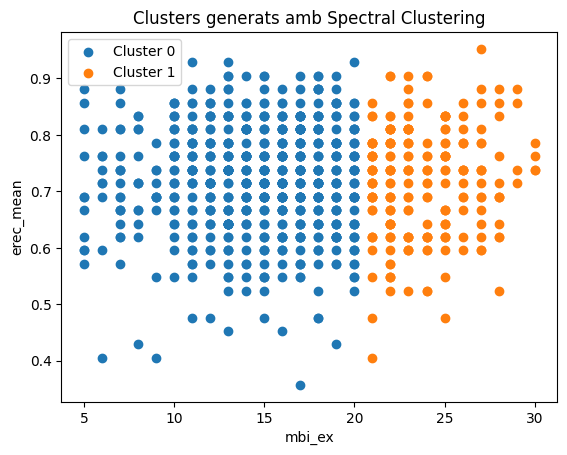

In [6]:
# Plot dels punts amb diferents colors segons el cluster al qual pertanyen
for i in range(n_clusters):
    cluster_points = df_clustered[df_clustered['cluster'] == i]
    plt.scatter(cluster_points['mbi_ex'], cluster_points['erec_mean'], label=f'Cluster {i}')

plt.title('Clusters generats amb Spectral Clustering')
plt.xlabel('mbi_ex')
plt.ylabel('erec_mean')
plt.legend()
plt.show()

In [7]:
# Grouping the data frame by cluster to get the properties of each cluster
cluster_grouped = df_clustered.groupby('cluster')
cluster_properties = cluster_grouped.mean()

# Printing the properties of each cluster (mean values of the variables)
print(cluster_properties)

             psyt       sex  erec_mean     mbi_ex
cluster                                          
0        0.194903  1.667166   0.720461  14.583208
1        0.315068  1.780822   0.719178  23.867580


In [8]:
# Getting the number of patients in each cluster
total_cluster = cluster_grouped.size()
total_cluster

cluster
0    667
1    219
dtype: int64

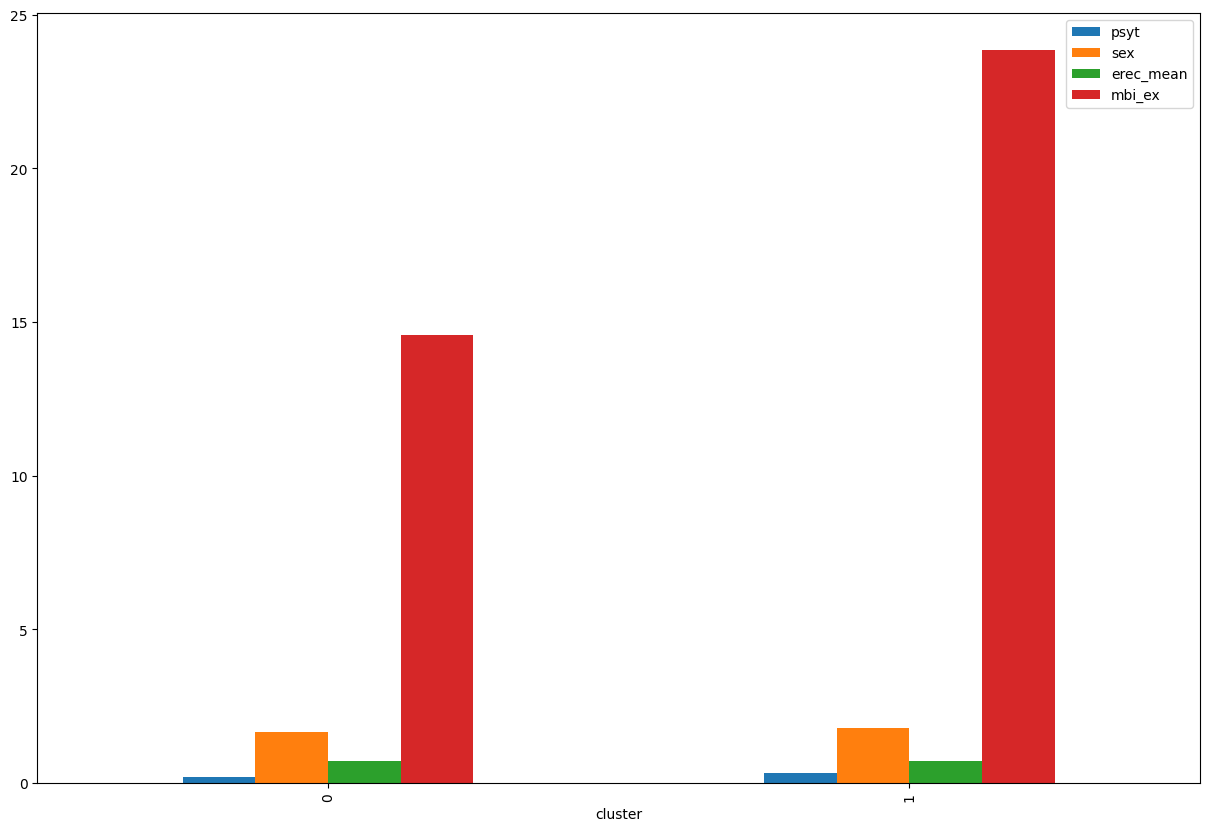

In [9]:
cluster_properties.plot(kind='bar', figsize=(15, 10))
plt.show()

In [12]:
cesd_max = 56
stai_t_max = 77
threshold = (cesd_max+stai_t_max)*0.6
threshold

79.8

In [13]:
#Fem Dataset per avaluar el model 
df_aval = df_clustered.copy() 
df_aval['target'] = y
df_aval

,psyt,sex,erec_mean,mbi_ex,cluster,target
0,0,1,0.738095,17,0,95
1,0,1,0.690476,14,0,40
2,0,2,0.690476,24,1,98
3,0,2,0.833333,16,0,65
4,0,1,0.690476,22,1,60
...,...,...,...,...,...,...
881,0,1,0.619048,23,1,80
882,0,2,0.809524,17,0,67
883,0,1,0.547619,15,0,59
884,1,2,0.785714,22,1,91


In [14]:
# Filtrem les files amb 'target' superior a threshold
df_target_gt_threshold = df_aval[df_aval['target'] > threshold]

# Fem el recompte agrupant per 'cluster'
count_by_cluster = df_target_gt_threshold.groupby('cluster').size()

# Mostrem el resultat
print("Recompte estudiants que necessiten ajuda\n", count_by_cluster)

print("\nRecompte estudiants totals en cluster\n", total_cluster)

Recompte estudiants que necessiten ajuda
 cluster
0     76
1    103
dtype: int64

Recompte estudiants totals en cluster
 cluster
0    667
1    219
dtype: int64


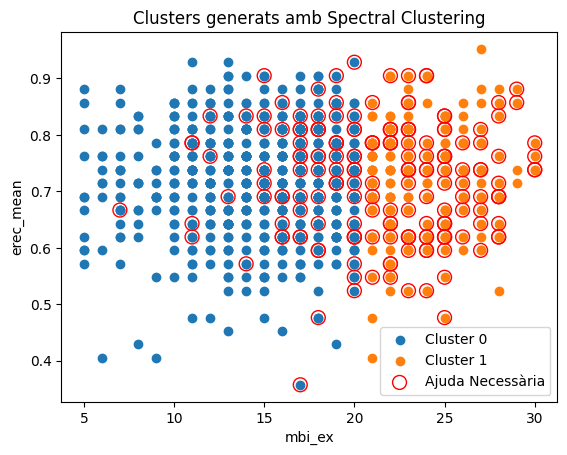

In [15]:
for i in range(n_clusters):
    cluster_points = df_clustered[df_clustered['cluster'] == i]
    plt.scatter(cluster_points['mbi_ex'], cluster_points['erec_mean'], label=f'Cluster {i}')

# Plot dels punts que superen el llindar amb marques diferents (per exemple, cercles buits)
plt.scatter(df_target_gt_threshold['mbi_ex'], df_target_gt_threshold['erec_mean'], label='Ajuda Necessària', facecolors='none', edgecolors='r', marker='o', s=100)

plt.title('Clusters generats amb Spectral Clustering')
plt.xlabel('mbi_ex')
plt.ylabel('erec_mean')
plt.legend()
plt.show()

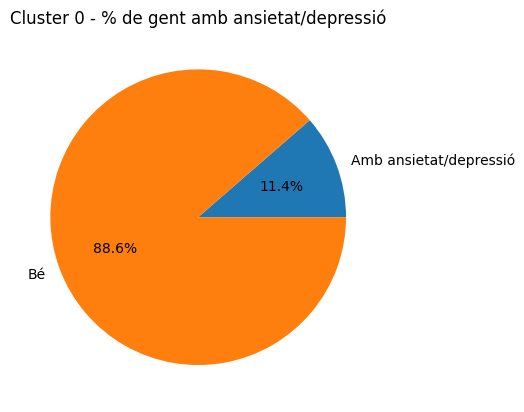

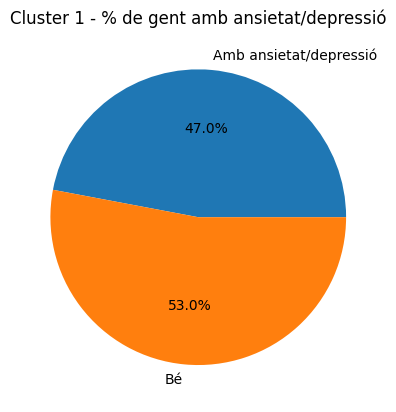

In [17]:
labels = 'Amb ansietat/depressió', 'Bé'
dades = []
for c in range(n_clusters):
    resta = total_cluster[c] - count_by_cluster[c]
    dades.append([count_by_cluster[c], resta])

for i, d in enumerate(dades):
    fig, ax = plt.subplots()
    ax.pie(d, labels=labels, autopct='%1.1f%%')
    ax.set_title(f'Cluster {i} - % de gent amb ansietat/depressió')
    plt.show()

# Linear Regression II - affinity: rbf, n_clusters=3

In [18]:
import pandas as pd

df = pd.read_csv("datasets/Data Carrard.csv")
df = df.drop('id', axis = 1)
df['target'] = df['stai_t'] + df['cesd']
df = df.drop(['stai_t', 'cesd'], axis=1)
X = df.drop('target', axis=1)
y = df['target']

In [19]:
# X Linear Regression
X_lr = X[['psyt', 'sex', 'erec_mean', 'mbi_ex']]

In [20]:
from sklearn.cluster import SpectralClustering
import matplotlib.pyplot as plt

n_clusters = 3  # Ajustar el número deseado de clusters
model_sc = SpectralClustering(n_clusters=n_clusters, affinity='rbf', random_state=42)
clusters = model_sc.fit_predict(X_lr)

In [21]:
df_clustered = X_lr.copy() 
df_clustered['cluster'] = clusters 
df_clustered.head(5) 

,psyt,sex,erec_mean,mbi_ex,cluster
0,0,1,0.738095,17,0
1,0,1,0.690476,14,0
2,0,2,0.690476,24,2
3,0,2,0.833333,16,0
4,0,1,0.690476,22,2


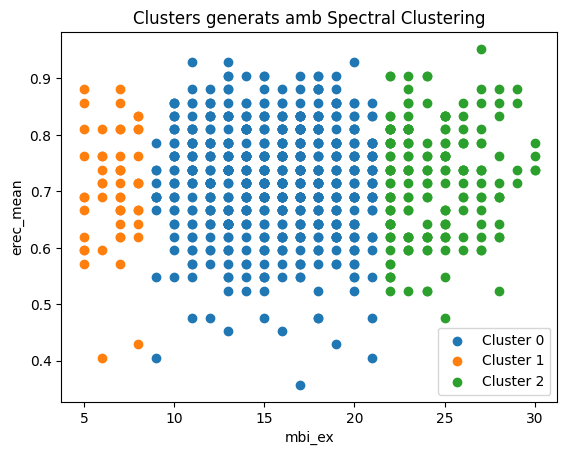

In [22]:
# Plot dels punts amb diferents colors segons el cluster al qual pertanyen
for i in range(n_clusters):
    cluster_points = df_clustered[df_clustered['cluster'] == i]
    plt.scatter(cluster_points['mbi_ex'], cluster_points['erec_mean'], label=f'Cluster {i}')

plt.title('Clusters generats amb Spectral Clustering')
plt.xlabel('mbi_ex')
plt.ylabel('erec_mean')
plt.legend()
plt.show()

In [23]:
# Grouping the data frame by cluster to get the properties of each cluster
cluster_grouped = df_clustered.groupby('cluster')
cluster_properties = cluster_grouped.mean()

# Printing the properties of each cluster (mean values of the variables)
print(cluster_properties)

             psyt       sex  erec_mean     mbi_ex
cluster                                          
0        0.208589  1.685583   0.720859  15.558282
1        0.117647  1.509804   0.706349   6.647059
2        0.311475  1.781421   0.721442  24.431694


In [24]:
# Getting the number of patients in each cluster
total_cluster = cluster_grouped.size()
total_cluster

cluster
0    652
1     51
2    183
dtype: int64

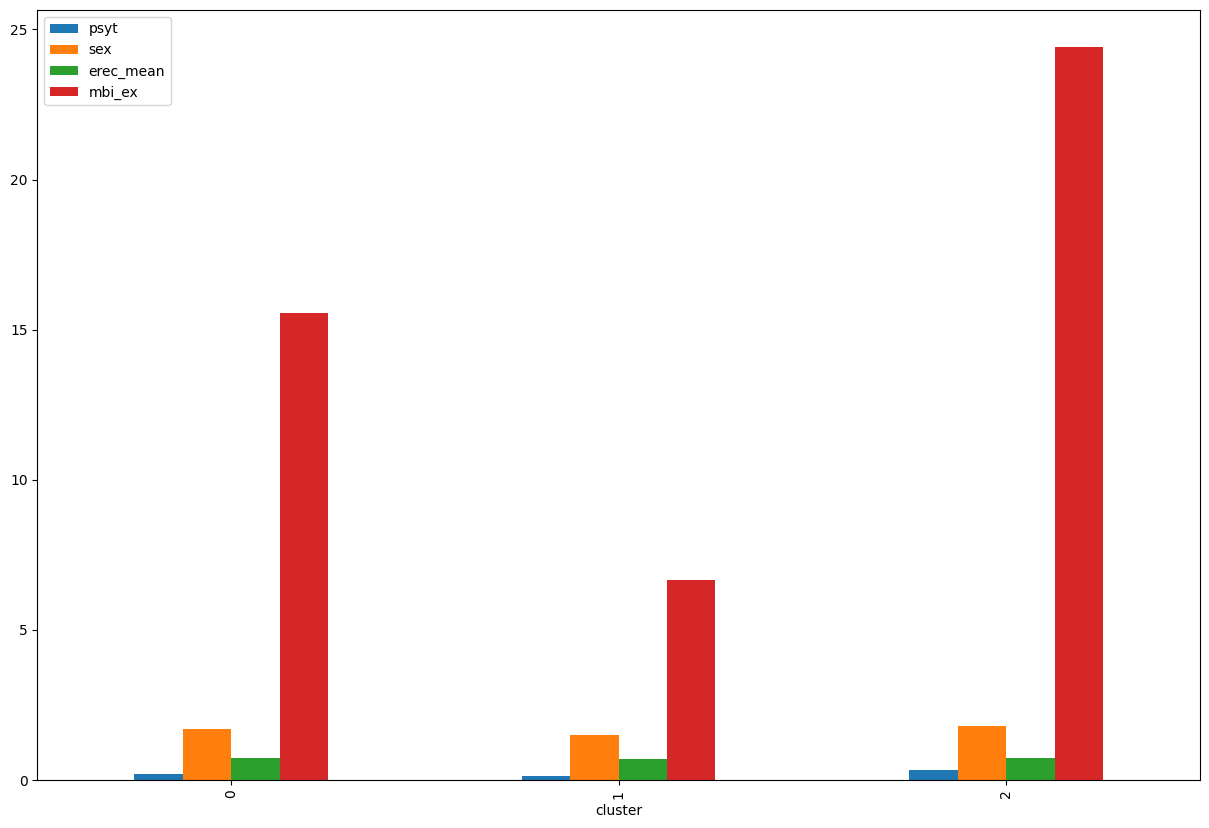

In [25]:
cluster_properties.plot(kind='bar', figsize=(15, 10))
plt.show()

In [26]:
cesd_max = 56
stai_t_max = 77
threshold1 = (cesd_max+stai_t_max)*0.33
print("threshold1", threshold1)
threshold2 = (cesd_max+stai_t_max)*0.66
print("threshold2", threshold2)

threshold1 43.89
threshold2 87.78


In [27]:
#Fem Dataset per avaluar el model 
df_aval = df_clustered.copy() 
df_aval['target'] = y
df_aval

,psyt,sex,erec_mean,mbi_ex,cluster,target
0,0,1,0.738095,17,0,95
1,0,1,0.690476,14,0,40
2,0,2,0.690476,24,2,98
3,0,2,0.833333,16,0,65
4,0,1,0.690476,22,2,60
...,...,...,...,...,...,...
881,0,1,0.619048,23,2,80
882,0,2,0.809524,17,0,67
883,0,1,0.547619,15,0,59
884,1,2,0.785714,22,2,91


In [28]:
# Filtrem les files amb 'target' superior a threshold
df_target_gt_threshold1 = df_aval[df_aval['target'] < threshold1]
df_target_gt_threshold2 = df_aval[(df_aval['target'] > threshold1) & (df_aval['target'] < threshold2)]
df_target_gt_threshold3 = df_aval[df_aval['target'] > threshold2]

# Fem el recompte agrupant per 'cluster'
count_by_cluster1 = df_target_gt_threshold1.groupby('cluster').size()
count_by_cluster2 = df_target_gt_threshold2.groupby('cluster').size()
count_by_cluster3 = df_target_gt_threshold3.groupby('cluster').size()

# Mostrem els resultats
print("Recompte estudiants que NO necessiten ajuda\n", count_by_cluster1)
print("\nRecompte estudiants recomanable rebre ajuda\n", count_by_cluster2)
print("\nRecompte estudiants que SÍ necessiten ajuda\n", count_by_cluster3)

print("\nRecompte estudiants totals en cluster\n", total_cluster)

Recompte estudiants que NO necessiten ajuda
 cluster
0    160
1     41
2      8
dtype: int64

Recompte estudiants recomanable rebre ajuda
 cluster
0    446
1     10
2    109
dtype: int64

Recompte estudiants que SÍ necessiten ajuda
 cluster
0    46
2    66
dtype: int64

Recompte estudiants totals en cluster
 cluster
0    652
1     51
2    183
dtype: int64


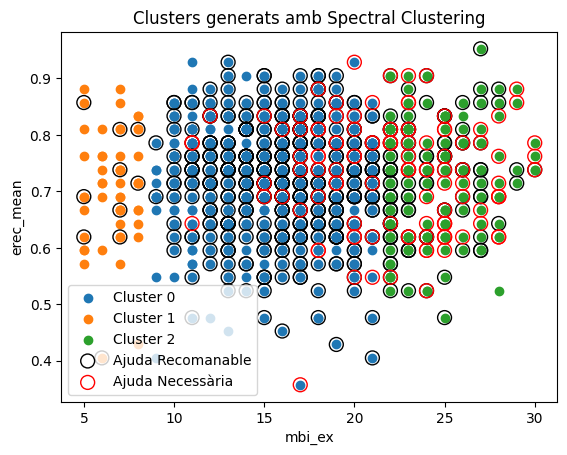

In [29]:
for i in range(n_clusters):
    cluster_points = df_clustered[df_clustered['cluster'] == i]
    plt.scatter(cluster_points['mbi_ex'], cluster_points['erec_mean'], label=f'Cluster {i}')

# Plot dels punts que superen el llindar amb marques diferents (per exemple, cercles buits)
plt.scatter(df_target_gt_threshold2['mbi_ex'], df_target_gt_threshold2['erec_mean'], label='Ajuda Recomanable', facecolors='none', edgecolors='black', marker='o', s=100)
plt.scatter(df_target_gt_threshold3['mbi_ex'], df_target_gt_threshold3['erec_mean'], label='Ajuda Necessària', facecolors='none', edgecolors='r', marker='o', s=100)

plt.title('Clusters generats amb Spectral Clustering')
plt.xlabel('mbi_ex')
plt.ylabel('erec_mean')
plt.legend()
plt.show()

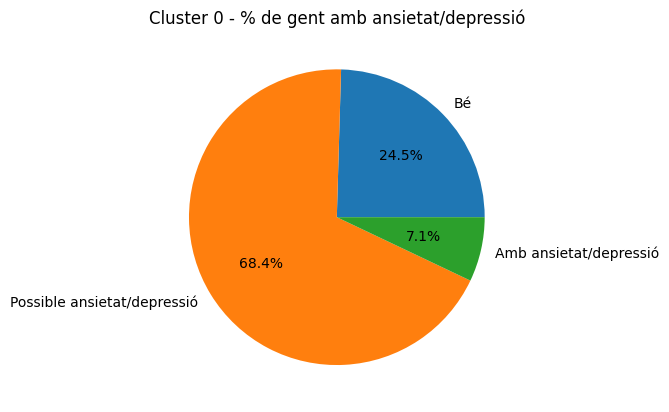

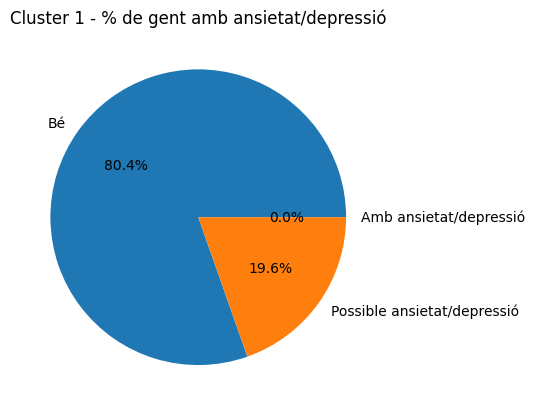

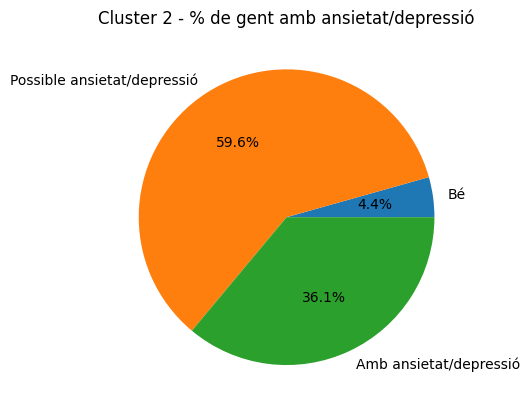

In [31]:
import matplotlib.pyplot as plt

labels = 'Bé', 'Possible ansietat/depressió', 'Amb ansietat/depressió'
dades = []

for c in range(n_clusters):
    count1 = count_by_cluster1.get(c, 0)
    count2 = count_by_cluster2.get(c, 0)
    count3 = count_by_cluster3.get(c, 0)
    dades.append([count1, count2, count3])

for i, d in enumerate(dades):
    fig, ax = plt.subplots()
    ax.pie(d, labels=labels, autopct='%1.1f%%')
    ax.set_title(f'Cluster {i} - % de gent amb ansietat/depressió')
    plt.show()